## Compares U fraction in RNA classes

In [1]:
import pybedtools 
import sys
import numpy as np
import pandas as pd
import os
import itertools
import math
import matplotlib.pyplot as plt
from itertools import chain
import matplotlib
import seaborn as sns; sns.set(color_codes=True)
from matplotlib.colors import LinearSegmentedColormap
from collections import Counter  

%matplotlib inline

#### set parameters

In [2]:
home_dir = '/home/salma/Coding/cluster' 

pipeline_dir = os.path.join(home_dir, 'pipeline')
plotting_dir = os.path.join(home_dir, 'plots/Enrichment_analysis')
analysis_dir = os.path.join(home_dir, 'data_analysis')

all_yeast = pybedtools.BedTool(os.path.join(home_dir, 'Annotations/saccharomyces_cerevisiae.gff')).remove_invalid().saveas()

In [3]:
all_features = pd.read_csv(os.path.join(home_dir, "Annotations/salma/all_features_utr.bed"), sep = '\t', header = None)
all_features.columns = ['chr','start','end','type','strand','s1','s2']

In [4]:
#bed file to fasta file
#bedtools getfasta -s -fi ~/CLIP/Reference_genome/WholeGenomeFasta/genome.fa -bed ~/CLIP/Annotations/salma/all_features_utr.bed -fo ~/CLIP/Annotations/salma/all_features_utr.fa

#### parse fasta file

In [5]:
def fasta_parser(filename):
    with open(filename, 'r') as f:
        s = f.readlines()
    seqs = list(map(str.rstrip, s[1::2]))
    headers = list(map(str.rstrip, s[0::2]))
    return pd.DataFrame(np.column_stack([headers, seqs]), columns=['header', 'seq'])

In [6]:
seqs = fasta_parser(os.path.join(home_dir, 'Annotations/salma/all_features_utr.fa'))

In [7]:
len(seqs)

18820

In [8]:
features = all_features.loc[all_features.chr!='chrmt',:]
features = features.loc[features.end-features.start!=0,:]

In [9]:
len(features)

18820

In [10]:
features['seq'] = seqs.seq

In [11]:
grouped = {k: v for k, v in features.groupby(features.type)}

In [12]:
def count_bases(feature_df):
    seq_appended = ''.join(x for x in list(feature_df.seq.values) if x is not np.nan)
    return(Counter(seq_appended))

In [13]:
counts={}
ratios={}
for f in features.type.unique():
    counts[f] = count_bases(grouped[f])
    ratios[f] = counts[f]['T']/(counts[f]['A']+counts[f]['C']+counts[f]['G']+counts[f]['T'])

In [14]:
ratios

{'CDS': 0.2774841777110248,
 'CUTs': 0.32506526498989446,
 'NUTs': 0.32644245485154577,
 'SUTs': 0.30310114405114097,
 'UTR3': 0.3601493721936622,
 'UTR5': 0.29949305809280236,
 'intron': 0.3273741279804124,
 'rRNA_gene': 0.2910902047592695,
 'snRNA_gene': 0.3215434083601286,
 'snoRNA_gene': 0.2983466468511982,
 'tRNA_gene': 0.29259790855033835}

In [15]:
order=['UTR5', 'CDS', 'intron', 'UTR3','rRNA_gene', 'tRNA_gene','snoRNA_gene', 'snRNA_gene','SUTs', 'CUTs', 'NUTs']

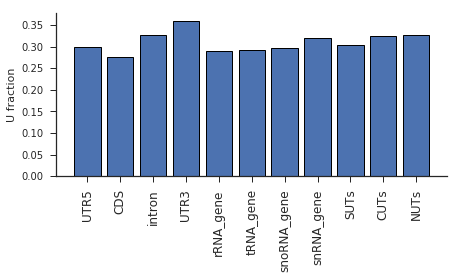

In [17]:
fig, ax = plt.subplots(figsize=(7,3))
sns.set_style("ticks")
plt.bar(np.arange(len(order)), [ratios[o] for o in order], linewidth=1, edgecolor='black')
xt=plt.xticks(np.arange(len(order)), order, rotation=90, fontsize=12)
ax.set_ylabel('U fraction')
sns.despine()
plt.savefig(os.path.join(plotting_dir,'U_fraction.pdf'), bbox_inches='tight')